# Import Necessary Libraries

In [1]:
# let`s first import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Read the dataset

In [2]:
# let`s now load the titanic dataset
data=pd.read_csv("../input/titanicdataset-traincsv/train.csv")

In [3]:
data.head() # look at the starting five rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape # rows and columns in the dataset

(891, 12)

In [5]:
data.describe() #gives the statistical summary of the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Preprocessing

1. Fill the missing values
2. Convert the data type of age (float64) to int64

In [7]:
data.isnull().sum() #look for the missing value within the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# As the "age,cabin and Embarked column have missing values" so let`s fill the missing values

In [9]:
#let`s look at the cabin column
data["Cabin"].isnull().sum()

687

In [10]:
# so we have 687 missing values in cabin column so let`s drop this column
data.drop(["Cabin"],axis=1,inplace=True)

In [11]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
# let`s now look at the `Age` column
data["Age"].isnull().sum()

177

In [13]:
# In Age column we have 177 missing value so let`s fill these values with mean or median , 
# I will use mean to fill it
Age_mean=data["Age"].mean()
data["Age"]=data["Age"].fillna(Age_mean)

In [14]:
# Now let`s have look at Age column
data["Age"].isnull().sum()

0

In [15]:
data=data.dropna() # Embarked has only 2 missing values so let`s drop the rows 

In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
data.shape

(889, 11)

# Exploratory Data Analysis

In [18]:
# By looking at the data we can analyse that "PassengerId,Name,SibSp,Parch,Ticket ,Fare,Embarked" 
# can not effect on the survival of passenger
features=data[["Pclass","Sex","Age","Fare"]]
target=data["Survived"]

In [19]:
# As "Sex" is categorical data so let`s use LabelEncoder to covert it into Numerical data
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder() #let`s create object of LabelEncoder
features["Sex_n"]=le.fit_transform(features["Sex"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
features
# Sex column is converted into numerical column

,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.000000,7.2500,1
1,1,female,38.000000,71.2833,0
2,3,female,26.000000,7.9250,0
3,1,female,35.000000,53.1000,0
4,3,male,35.000000,8.0500,1
...,...,...,...,...,...
886,2,male,27.000000,13.0000,1
887,1,female,19.000000,30.0000,0
888,3,female,29.699118,23.4500,0
889,1,male,26.000000,30.0000,1


In [22]:
# Now let`s drop the original "Sex" column
features.drop(["Sex"],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
features

,Pclass,Age,Fare,Sex_n
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


# MODEL BUILDING

In [24]:
# before building the model let`s split the dataset using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [25]:
len(x_train)

711

In [26]:
len(x_test)

178

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train) #fit method is used to train the model so here we are training our model
model.score(x_test,y_test)  # score method will take "x_test" and will calculate survival rate
# and will compare it with y_test and will give the accuracy of the model

0.7752808988764045

## Decision Tree

In [28]:
# let`s now use decision tree algorithm for prediction
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7808988764044944

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8146067415730337

# Fine Tuning

From the above models we can observe that without fine tuning any of the model, the Random Forest give us the best accuracy so lets fine tune the hyper parameters of the Random Forest.

In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50,max_depth=10,random_state=42)
model.fit(x_train,y_train)
print("The accuracy of model is: ",model.score(x_test,y_test)*100)

The accuracy of model is:  82.02247191011236


So we can see that after fine tuning our accuracy is increased 
Now our accuracy is 86% which is pretty good. yayyyy :D

Lets now predict the survival of the pessengers using our Random Forest model.

In [31]:
y_predicted= model.predict(x_test)
y_predicted

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0])

# Confusion Matric

<AxesSubplot:>

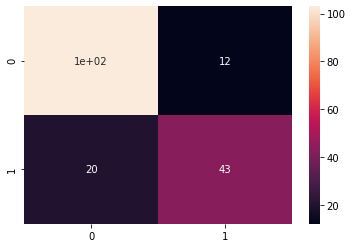

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True)